In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from matplotlib.colors import ListedColormap

# Load dataset diabetes dari file CSV
df = pd.read_csv('heart.csv')


In [2]:
# Eksplorasi data
print("Fitur:", df.columns[:-1].tolist())  
print("Label:", df.columns[-1])                

Fitur: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Label: target


In [3]:
print("\nInfo tipe data:")
df.info()


Info tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB



Visualisasi persebaran data:


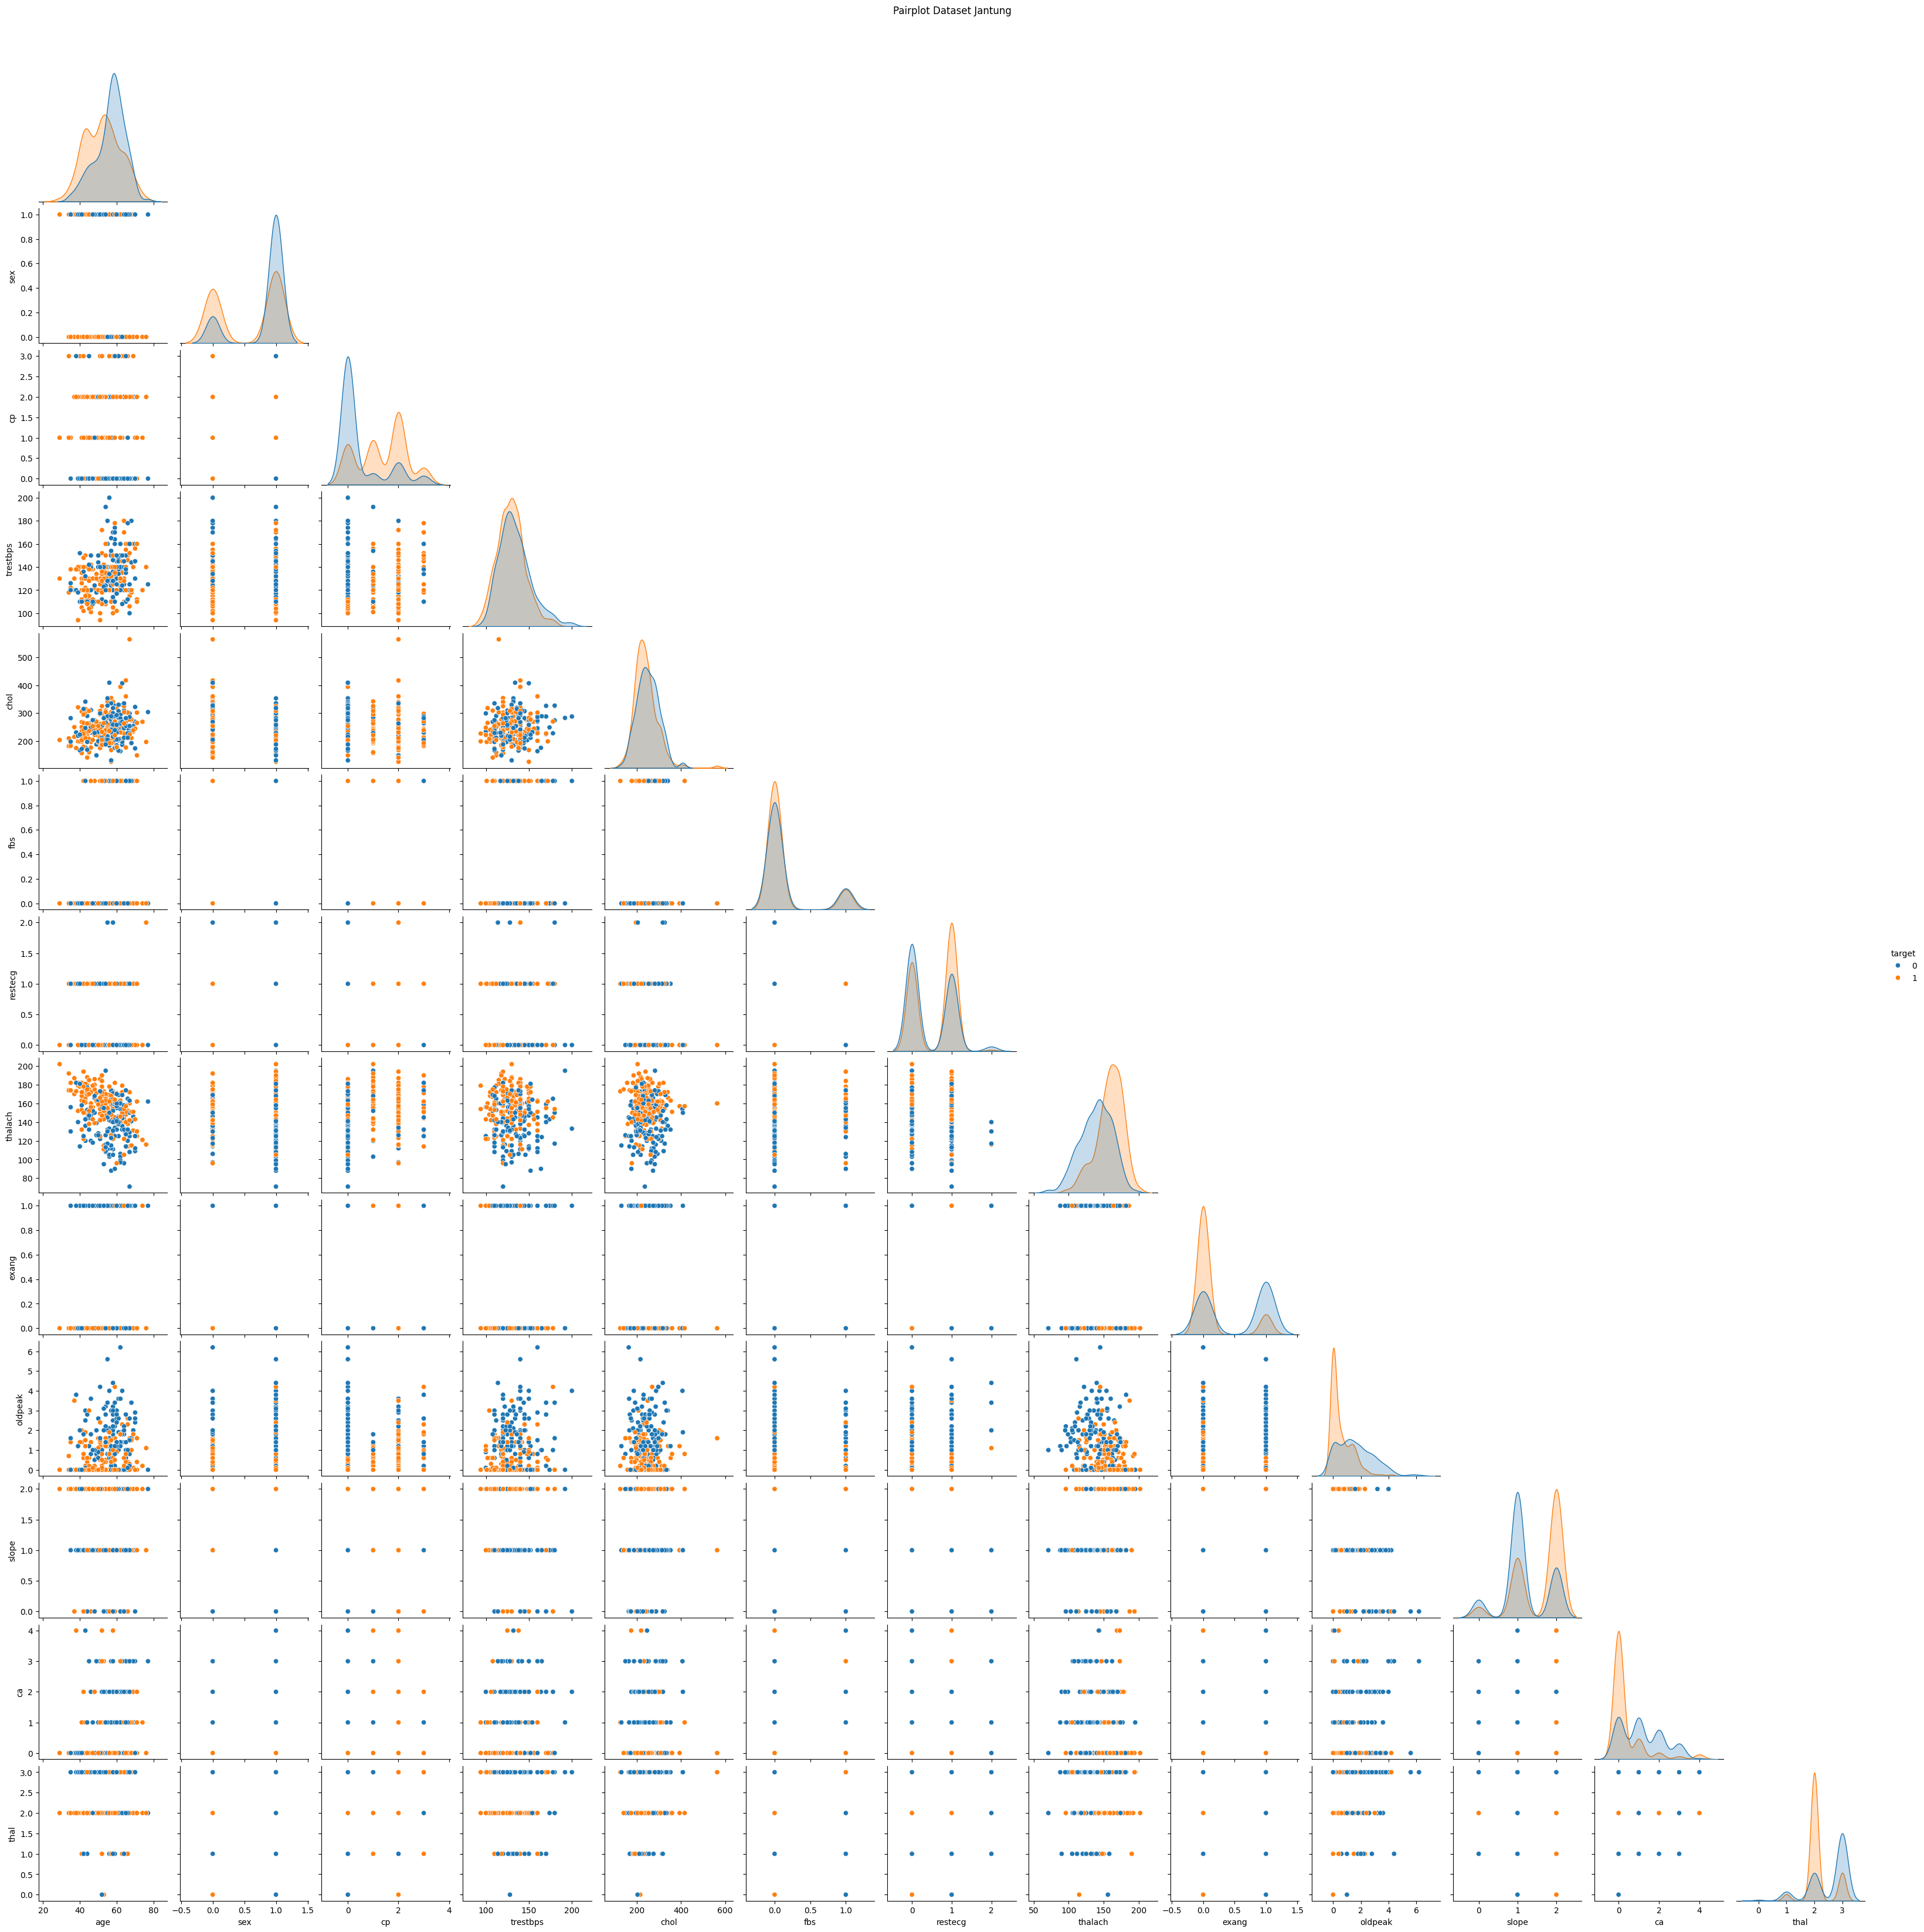

In [4]:
print("\nVisualisasi persebaran data:")
sns.pairplot(df, hue='target', corner=True)
plt.suptitle("Pairplot Dataset Jantung", y=1.02)
plt.show()


Korelasi antar variabel:


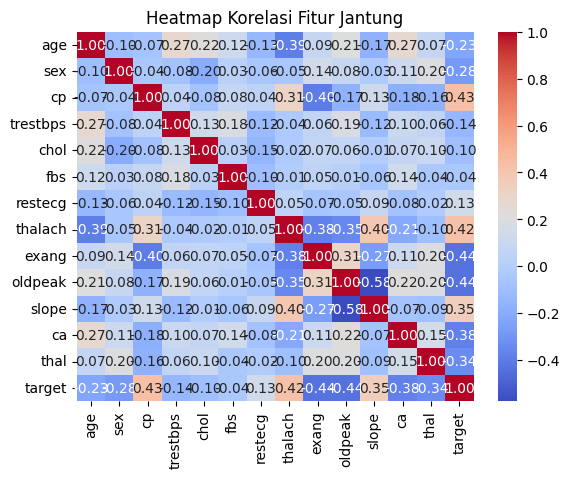

In [5]:
print("\nKorelasi antar variabel:")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Jantung")
plt.show()

In [6]:
# Cek dimensi data
print("\nData shape (fitur + target):", df.shape)

# Lihat 5 data pertama dari fitur (tampilkan dataframe)
print("\n5 data pertama (fitur saja):")
print(df.iloc[0:5, :-1])


Data shape (fitur + target): (1025, 14)

5 data pertama (fitur saja):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  


In [ ]:
# Lihat semua label (Outcome)
np.set_printoptions(threshold=np.inf)

# Menampilkan seluruh nilai pada kolom 'target'
print("\nLabel (Target) dari dataset:")
print(df['target'].values)


Label (Target) dari dataset:
[0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0
 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0
 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0
 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1
 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1
 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1

In [9]:
# Pisahkan data fitur (X) dan target (y)
X = df.drop('target', axis=1).values
y = df['target'].values

# Bagi data menjadi training dan testing (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

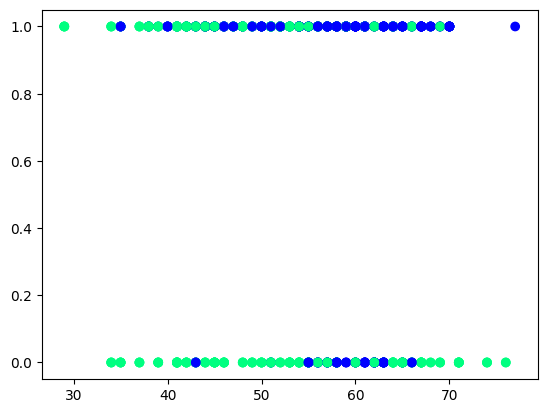

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
classifier = SVC(kernel = 'rbf', random_state=0, C=100)
classifier.fit(X_train, y_train)

SVC(C=100, random_state=0)

In [13]:
y_pred = classifier.predict(X_test)
print("hasil akurasi :", metrics.accuracy_score(y_test,y_pred))

hasil akurasi : 1.0


In [14]:
# Prediksi data testing
y_pred = classifier.predict(X_test)

# Tampilkan hasil prediksi dan nilai sebenarnya
print("Hasil prediksi (y_pred):")
print(y_pred)

print("\nNilai sebenarnya (y_test):")
print(y_test)

Hasil prediksi (y_pred):
[1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0]

Nilai sebenarnya (y_test):
[1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
print("precision:", metrics.precision_score(y_test,y_pred))
print("recall" , metrics.recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

# Tampilkan laporan klasifikasi (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[[131   0]
 [  0 126]]
acuracy: 1.0
precision: 1.0
recall 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       126

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       126

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



<Axes: >

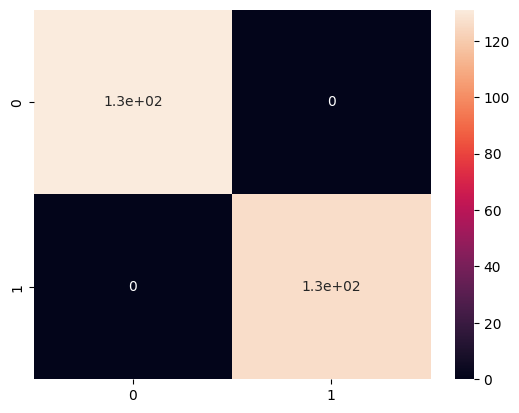

In [16]:
sns.heatmap(cm, annot=True)

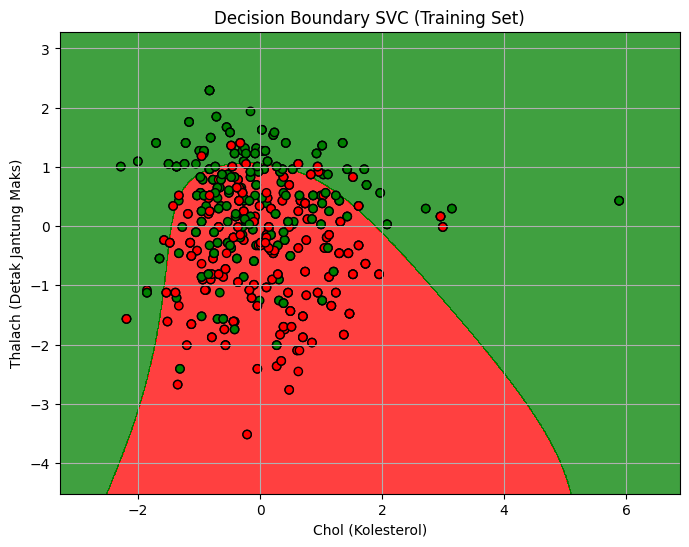

In [17]:
# Fungsi visualisasi untuk fitur chol (kolesterol) dan thalach (detak jantung maksimum)
def plot_decision_boundary_chol_thalach(X_set, y_set, classifier, title):
    feature1_index = list(df.columns).index('chol')
    feature2_index = list(df.columns).index('thalach')

    X1 = X_set[:, feature1_index]
    X2 = X_set[:, feature2_index]

    X1_grid, X2_grid = np.meshgrid(
        np.arange(start=X1.min() - 1, stop=X1.max() + 1, step=0.01),
        np.arange(start=X2.min() - 1, stop=X2.max() + 1, step=0.01)
    )

    n_samples = X1_grid.ravel().shape[0]
    X_grid_full = np.zeros((n_samples, X_set.shape[1]))
    X_grid_full[:, feature1_index] = X1_grid.ravel()
    X_grid_full[:, feature2_index] = X2_grid.ravel()

    y_pred_grid = classifier.predict(X_grid_full).reshape(X1_grid.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(X1_grid, X2_grid, y_pred_grid, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X1, X2, c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
    plt.title(title)
    plt.xlabel('Chol (Kolesterol)')
    plt.ylabel('Thalach (Detak Jantung Maks)')
    plt.grid(True)
    plt.show()

# Visualisasi pada training set
plot_decision_boundary_chol_thalach(X_train, y_train, classifier, title='Decision Boundary SVC (Training Set)')

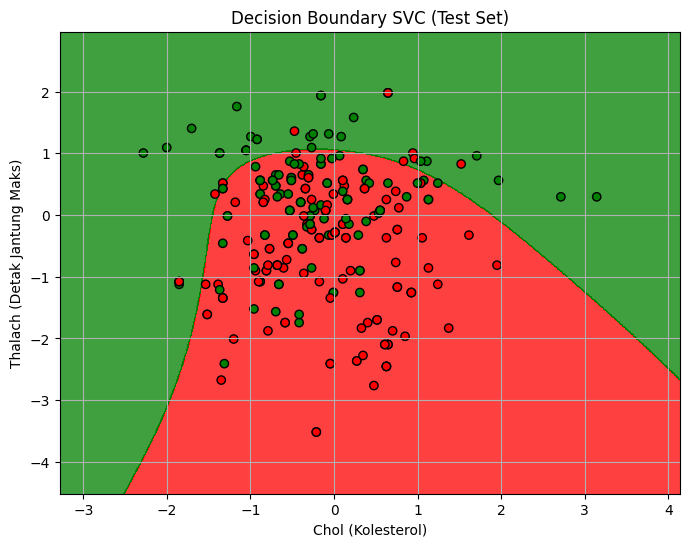

In [18]:
# Visualisasi model SVM terhadap Test set (fitur chol dan thalach)
feature1_index = list(df.columns).index('chol')    # Kolom kolesterol
feature2_index = list(df.columns).index('thalach') # Kolom detak jantung maksimum

X_set, y_set = X_test, y_test
X1 = X_set[:, feature1_index]
X2 = X_set[:, feature2_index]

X1_grid, X2_grid = np.meshgrid(
    np.arange(start=X1.min() - 1, stop=X1.max() + 1, step=0.01),
    np.arange(start=X2.min() - 1, stop=X2.max() + 1, step=0.01)
)

n_samples = X1_grid.ravel().shape[0]
Xpred = np.zeros((n_samples, X_set.shape[1]))  # Semua fitur = 0
Xpred[:, feature1_index] = X1_grid.ravel()
Xpred[:, feature2_index] = X2_grid.ravel()

y_pred = classifier.predict(Xpred).reshape(X1_grid.shape)

plt.figure(figsize=(8,6))
plt.contourf(X1_grid, X2_grid, y_pred, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X1, X2, c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Decision Boundary SVC (Test Set)')
plt.xlabel('Chol (Kolesterol)')
plt.ylabel('Thalach (Detak Jantung Maks)')
plt.grid(True)
plt.show()